<a href="https://colab.research.google.com/github/Parteche/CienciaDeDatos/blob/main/Proyecto_final_Paulina_Adams_y_Michel_Acosta_Modulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto modulo 4 **Save the bees!**

Machine Learning

Por: Michel Acosta y Paulina Adams

Las abejas son el polinizador mas importante y el mundo las necesita y su poblacion ha estado disminuyendo a niveles alarmantes por multiples factores como:

- Cambio climatico
- Parasitos
- Enfermedades
- Pesticidas

Esta base de datos contiene informacion recolectada entre los años 2015 a 2022 en Estados Unidos, si bien no es todo el mundo es una buena muestra de lo que esta pasando con las abejas.

**Objetivo** Predecir el numero total de colonias de abejas (num_colonies) en un futuro basado en las caracteristicas actuales y pasadas.

Columnas:

- State: nombre de los estados de Estados Unidos
- num_colonies: numero de colonias de abejas
- max_colonies: numero maximo de colonias en un cuarto de año
- lost_colonies: numero de colonias que se han perdido en un cuarto de año
- percent_lost: Porcentaje de colonias de abejas que se perdieron en un cuarto de año
- renovated_colonies: Colonias que tuvieron abejas nuevas
- percent_renovated: Porcentaje de colonias de abejas que se renovaron
- quarter: **Q1** Enero a Marzo, **Q2** Abril a Junio, **Q3** Julio a Septiembre, **Q4** Octubre a Diciembre
- year: Año en el que se colectaron los datos
- varroa_mites: Porcentaje de colonias de abeja que fueron afectadas por acaros
- other_pests_and_parasites: Porcentaje de colonias de abejas afectadas por diferentes insectos
- diseases: Porcentajes de colonias aectadas por enfermedades
- pesticides: Porcentajes de colonias afectadas por pesticidas
- other: Porcentaje de colonias afectadas por causas que varias que se agruparon
- unknown: Porcentaje de colonias afectadas por causas desconocidas

Empezaremos a trabajar con una base de datos limpia, para limpiarla usamos varios metodos de panda como:
- dropna() para eliminar celdas en blanco
- drop_duplicates() para eliminar datos duplicados
- fillna() para limpiar datos faltantes y asi evitar que los valores nulos nos causen problemas
- astype() para corregir los tipos de datos de las columnas

In [ ]:
#Librerias:
#importamos pandas
import pandas as pd
#importamos numpys
import numpy as np
#importamos seaborn
import seaborn as sns
#importamos matplotlib
import matplotlib.pyplot as plt
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
#Escalado de caracteristicas
from sklearn.preprocessing import StandardScaler
#Modelo Arboles de Decision
from sklearn.tree import DecisionTreeRegressor
#Modelo de Random Forest
from sklearn.ensemble import RandomForestRegressor
#Modelo Gradient Boosting
import xgboost as xgb
#Modelo de Random Forest para clasificacion
from sklearn.ensemble import RandomForestClassifier
#Modelo Redes Neuronales Artificiales (ANN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
#Evaluar la precisión del modelo
from sklearn.metrics import accuracy_score
#Regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#Optimizacion del mejor modelo
from sklearn.model_selection import GridSearchCV



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importamos la base de datos CSV
df = pd.read_csv('/content/drive/MyDrive/save_the_bees.csv')

In [ ]:
#Metodo para ver las 5 primeras filas de la base de datos
df.head()

,state,state_code,num_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,quarter,year,varroa_mites,other_pests_and_parasites,diseases,pesticides,other,unknown
0,Alabama,AL,7000,7000,1800,26,2800,250,4,1,2015,10.0,5.4,0.0,2.2,9.1,9.4
1,Arizona,AZ,35000,35000,4600,13,3400,2100,6,1,2015,26.9,20.5,0.1,0.0,1.8,3.1
2,Arkansas,AR,13000,14000,1500,11,1200,90,1,1,2015,17.6,11.4,1.5,3.4,1.0,1.0
3,California,CA,1440000,1690000,255000,15,250000,124000,7,1,2015,24.7,7.2,3.0,7.5,6.5,2.8
4,Colorado,CO,3500,12500,1500,12,200,140,1,1,2015,14.6,0.9,1.8,0.6,2.6,5.9


In [ ]:
#Checaremos la estadistica de nuestro dataset
print(df.describe())

       num_colonies  max_colonies  lost_colonies  percent_lost  \
count  1.453000e+03  1.453000e+03    1453.000000   1453.000000   
mean   1.244700e+05  1.559487e+05   16759.710943     11.266345   
std    4.384997e+05  5.505931e+05   60681.042329      7.359984   
min    1.300000e+03  1.300000e+03       0.000000      0.000000   
25%    8.000000e+03  9.500000e+03     950.000000      6.000000   
50%    1.850000e+04  2.300000e+04    2200.000000     10.000000   
75%    5.900000e+04  7.900000e+04    7000.000000     14.000000   
max    3.181180e+06  4.174440e+06  502350.000000     65.000000   

       added_colonies  renovated_colonies  percent_renovated      quarter  \
count     1453.000000         1453.000000        1453.000000  1453.000000   
mean     15744.900206        13520.302822           7.112870     2.516173   
std      63548.439090        57201.973644           9.025198     1.132682   
min          0.000000            0.000000           0.000000     1.000000   
25%        380.00000

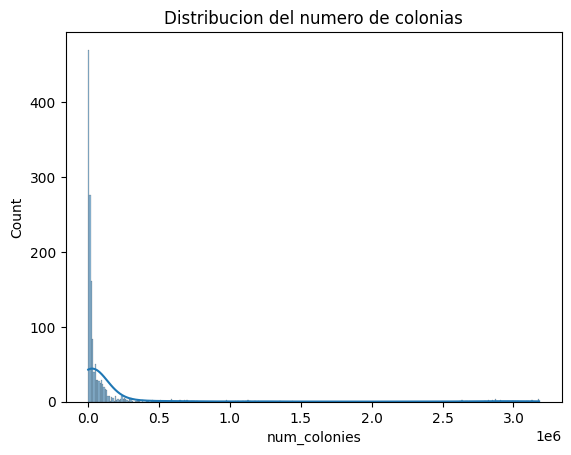

In [ ]:
#La distribucion de nuestra variable objetivo num_colonies
sns.histplot(df['num_colonies'], kde=True)
plt.title('Distribucion del numero de colonias')
plt.show()

La correlacion es una medida estadistica que indica el grado en que dos variables estan relacionadas entre si.

Los tipos de correlacion pueden ser:

- Positiva: cuando anbas variables se mueven en la misma direcion (osea que son directamente proporcionales) y la correlacion positiva perfecta se representa con un 1.

- Negativa: Cuando las variables se mueven en direciones opuestas (osea que son inversamente proporcionales) y la correlacion negativa perfecta se representa con un -1.

- Nula: Cuando no hay ninguna relacion entre las variables y se representa con un 0.

In [ ]:
#Correlacion entre todas las variables numericas
#Primero filtramos todas las variables numericas de nuestra base de datos
df_numerico = df.select_dtypes(include=['float64', 'int64'])

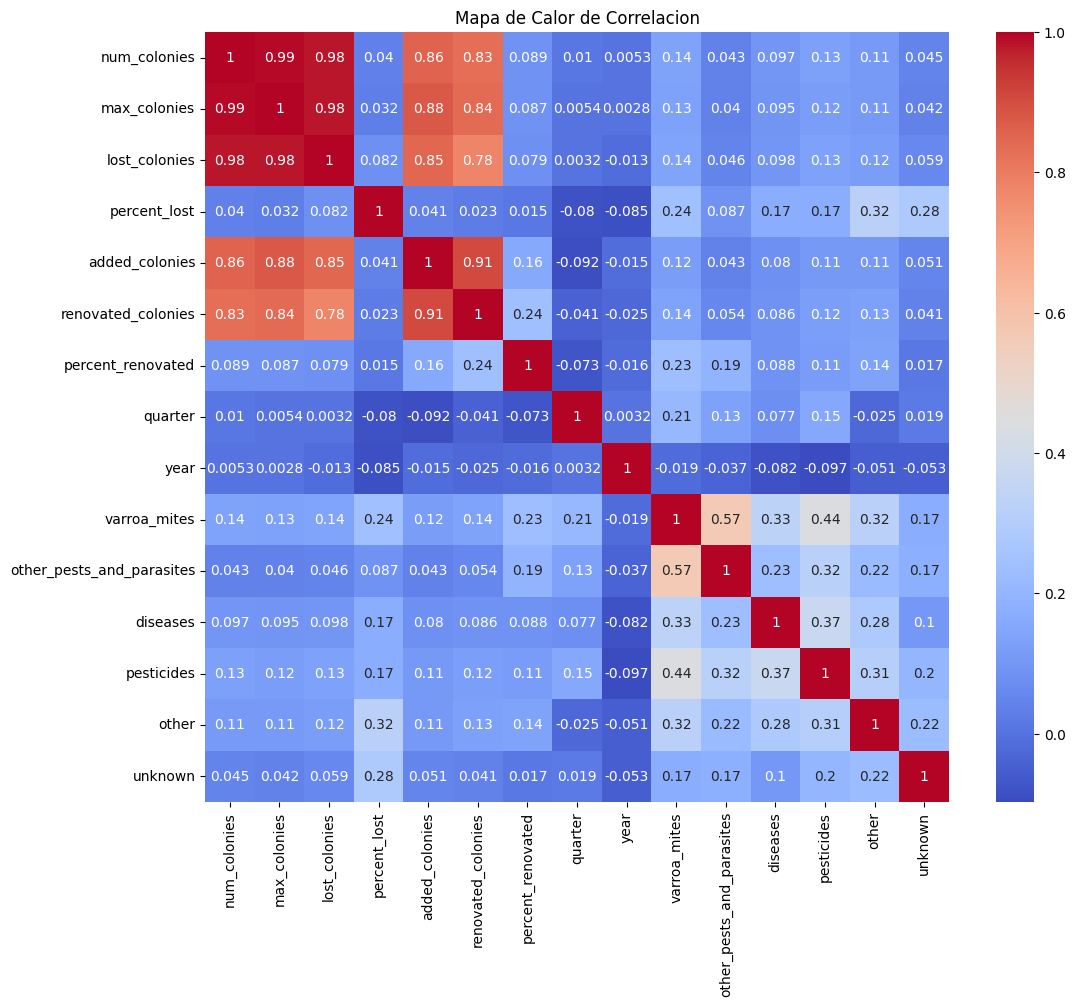

In [ ]:
#Ahora si, el mapa de correlacion entre todas las variables numericas
plt.figure(figsize=(12,10))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlacion')
plt.show()

In [ ]:
#Queremos identificar que variables tienen mayor correlacion con num_colonies
correlacion = df_numerico.corr()['num_colonies'].sort_values(ascending=False)
print(correlacion)

num_colonies                 1.000000
max_colonies                 0.991898
lost_colonies                0.978673
added_colonies               0.858549
renovated_colonies           0.831550
varroa_mites                 0.137018
pesticides                   0.126228
other                        0.110844
diseases                     0.096864
percent_renovated            0.088535
unknown                      0.044950
other_pests_and_parasites    0.042762
percent_lost                 0.039935
quarter                      0.010243
year                         0.005307
Name: num_colonies, dtype: float64


>Toca preparar nuestro dataset para modelar

In [ ]:
#Division del Dataset en conjunto de entrenamiento y prueba
#Definiendo las caracteristicas predictoras y la variable objetivo
X = df.drop(['num_colonies', 'max_colonies', 'state', 'state_code'], axis=1)
y = df['num_colonies']

#Division para el entrenamiento y prueba (80% entrenamiento y 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Vamos a escalar o normalizar nuestras variables
#Esto sirve para que todas nuestras variables tengan una escala comparable y nuestro modelo sea mas preciso
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Llego la seleccion y el entrenamiento, probaremos varios modelos de regresion para ver cual es mejor para nosotros

In [ ]:
results = {}

In [ ]:
#Regresion lineal
#Iniciar y entrenar el modelo
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

#Prediciones
y_pred_lr = lr.predict(X_test_scaled)

#Evaluacion
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

results['Regresion Lineal'] = [mse_lr, r2_lr]

print(f'Regresion Lineal - MSE: {mse_lr}, R2: {r2_lr}')

Regresion Lineal - MSE: 4437553904.872149, R2: 0.9669978771616486


In [ ]:
#Arboles de Decision
#Iniciar y entrenar el modelo
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

#Prediciones
y_pred_dt = dt.predict(X_test)

#Evaluacion
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

results['Arboles de Decision'] = [mse_dt, r2_dt]

print(f'Arboles de Decision - MSE: {mse_dt}, R2: {r2_dt}')

Arboles de Decision - MSE: 4043544816.1512027, R2: 0.9699281258130777


In [ ]:
#Random Forest
#Iniciar y entrenar el modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#Prediciones
y_pred_rf = rf.predict(X_test)

#Evaluacion
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

results['Random Forest'] = [mse_rf, r2_rf]

print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')

Random Forest - MSE: 2295442373.540893, R2: 0.9829287772489299


In [ ]:
#Gradient Boosting
#Iniciar y entrenar el modelo
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgbr.fit(X_train, y_train)

#Prediciones
y_pred_xgbr = xgbr.predict(X_test)

#Evaluacion
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
r2_xgbr = r2_score(y_test, y_pred_xgbr)

results['Gradient Boosting'] = [mse_xgbr, r2_xgbr]

print(f'Gradient Boosting - MSE: {mse_xgbr}, R2: {r2_xgbr}')

Gradient Boosting - MSE: 2249076324.6331644, R2: 0.9832736253738403


In [ ]:
#Redes neuronales Artificiales (ANN)
#Definir el modelo
ann = Sequential()
ann.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
ann.add(Dense(units=32, activation='relu'))
ann.add(Dense(units=1, activation='linear'))

#Compilar el modelo
ann.compile(optimizer='adam', loss='mean_squared_error')

#Entrenar el modelo
history = ann.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

#Predicciones
y_pred_ann = ann.predict(X_test_scaled).flatten()

#Evaluacion
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

results['Redes Neuronales Artificiales'] = [mse_ann, r2_ann]

print(f'Redes Neuronales Artificiales - MSE: {mse_ann}, R2: {r2_ann}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 245330001920.0000
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 225939210240.0000
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 306840567808.0000
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 218250657792.0000
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 284293398528.0000
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 222541889536.0000
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 204575047680.0000
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 223142395904.0000
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 217146867712.0000
Epoch 10/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 175026962432.0000
Epoch 11/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 192853049344.0000
Epoch 12/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 240562667520.0000
Epoch 13/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

***Evaluacion y seleccion del mejor modelo***

Vamos a comparar los modelos basandonos en el **Error Cuadratico Medio (MSE)** y en el **Coeficiente de Dererminacion (R²)**


| **Modelo**                   | **MSE**     | **R²**      |
|------------------------------|-------------|-------------|
| Regresión Lineal              | `mse_lr`    | `r2_lr`     |
| Árbol de Decisión             | `mse_dt`    | `r2_dt`     |
| Random Forest                 | `mse_rf`    | `r2_rf`     |
| XGBoost                       | `mse_xgbr`   | `r2_xgbr`    |
| Red Neuronal Artificial (ANN) | `mse_ann`   | `r2_ann`    |

- **MSE:** Entre menor sea es mejor
- **R²:** Entre mas cercano a 1 quiere decir que hubo un buen ajuste

                                        MSE        R2
Regresion Lineal               4.437554e+09  0.966998
Arboles de Decision            4.043545e+09  0.969928
Random Forest                  2.295442e+09  0.982929
Gradient Boosting              2.249076e+09  0.983274
Redes Neuronales Artificiales  3.680352e+09  0.972629


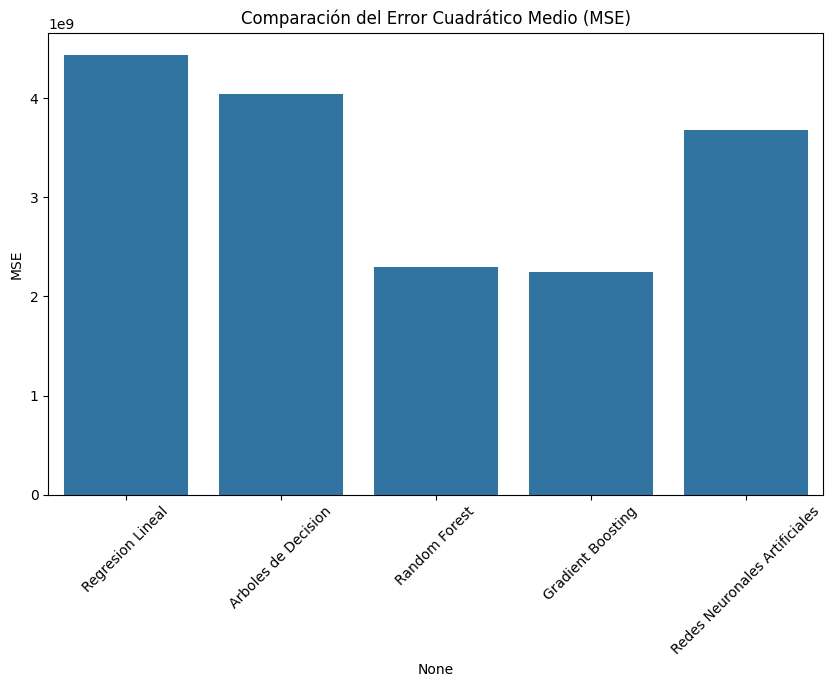

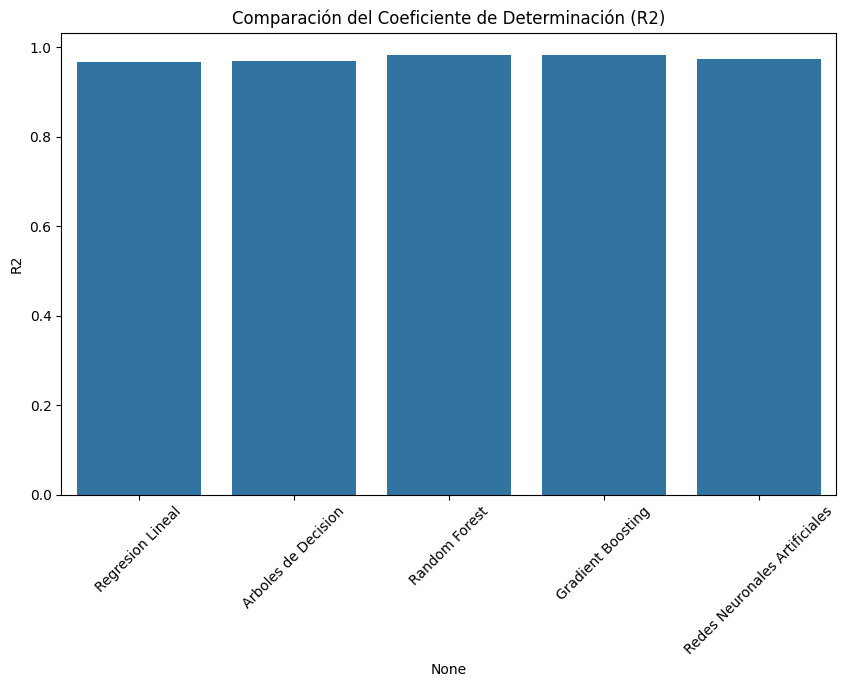

In [ ]:
#Con la logica de arriba entonces:
# Crear dataframe nuevo con los resultados
results_df = pd.DataFrame(results, index=['MSE', 'R2']).T

# Mostrar la tabla
print(results_df)

# Visualización de resultados con gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['MSE'])
plt.title('Comparación del Error Cuadrático Medio (MSE)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2'])
plt.title('Comparación del Coeficiente de Determinación (R2)')
plt.xticks(rotation=45)
plt.show()

Tanto la tabla como la grafica de arriba nos muestra que el coeficiente de determinacion R2 realmente es casi igual en todos los modelos y de hecho es cercana a 1, esto indica una gran variabilidad de los datos, osea el modelo tiene un buen ajuste. Al tener casi el mismo valor de R2 todos nuestros modelos no representa una caracteristica para tomar una decision (¿cual es el mejor modelo?).

Por otro lado, tenemos al error cuadratico MSE que es una metrica que evalua la calidad de un modelo de regresion en machine learning, que basicamente es la diferencia entre el valor real y el predicho por nuestro modelo, en nuestro caso si tenemos valores diferentes en los modelos que probamos, tanto en la tabla como en la grafica podemos notar que el valor del modelo **Gradient Boosting** tiene el valor mas chico de **MSE** osea que es el mejor modelo para nuestra base de datos.

Entre mas pequeño el valor del error cuadratico medio es mejor.

In [ ]:
#Ya encontramos el mejor modelo "Gradient Boosting", ahora toca optimizarlo
#Lo siguiente lo hacemos para optimizar nuestro mejor modelo y se llama: ajuste de hiperparametros usando Grid Search

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#Iniciando el modelo
GradientBoostingRegressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

#Iniciando Grid Search
grid_search = GridSearchCV(estimator=GradientBoostingRegressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

#Ejecutar Grid Search
grid_search.fit(X_train, y_train)

#Obtener Mejor modelo
best_model = grid_search.best_estimator_

print(f'Mejor Modelo: {best_model}')

#Evaluar el mejor modelo
y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Mejor Modelo - MSE: {mse_best}, R2: {r2_best}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:52:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Mejor Modelo: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, min_samples_leaf=1, min_samples_split=2,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=100, n_jobs=None, ...)
Mejor Modelo - MSE: 2249076324.6331644, R2: 0.9832736253738403
